# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a phase of the Data Science Cycle in which we can attain a deeper understanding of the data: understanding interactions, detection of atypical data, data distribution, data visualization, among others. 

In this session, we will do some EDA of the `diabetes` dataset. For now, as usual, let us import some libraries.

In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

Remember that this data was downloaded from this webpage: https://www.kaggle.com/vikasukani/diabetes-data-set. 

In [4]:
diabetes = pd.read_csv('diabetes-dataset.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Some statistics and skewness of a distribution

One of the first things one could do is compute some statistics to comprehend a bit better the data. One good option is to use Panda's `describe` method:

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Statistics such as standar deviation, mean, quantiles, and others, are provided by this method. One interesting thing is that these quantities can already tell us something about how a variable is distributed. For instance, a measure of **skewness** is the following formula:

$$\frac{\mu-\nu}{\sigma}$$,

where $\nu$ is the median, also known as the second quantile. If this quantity is positive, this commonly indicates that the tail of the data is on the right side of the distribution; if said quantity is negative, then the tail is on the left side. If both $\mu$ and $\nu$ are equal, then we are dealing with a symmetric distribution.

<img src="skewness.png" alt="Drawing" style="width: 700px;"/>

Notice that the well known variable `Pregnancies` has positive skewness. Let us verify that plotting a histogram of `Pregnancies` with Panda's `hist` method.

<Axes: >

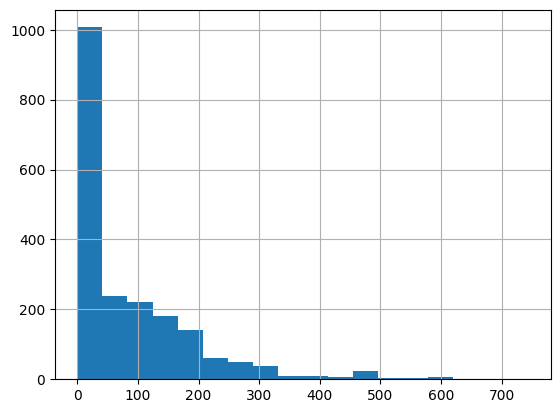

In [8]:
diabetes['Insulin'].hist(bins=18)

<Axes: >

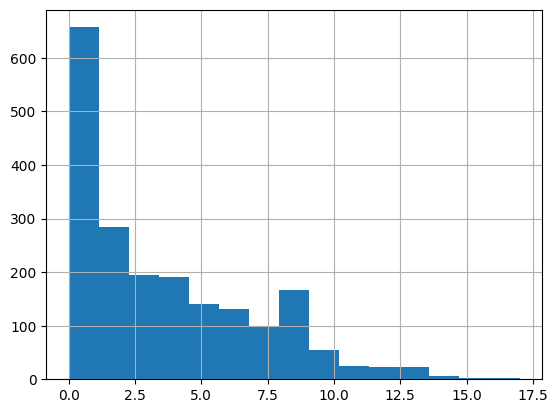

In [10]:
diabetes['Pregnancies'].hist(bins=15)

What about `SkinThickness` and `BMI`?

array([[<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

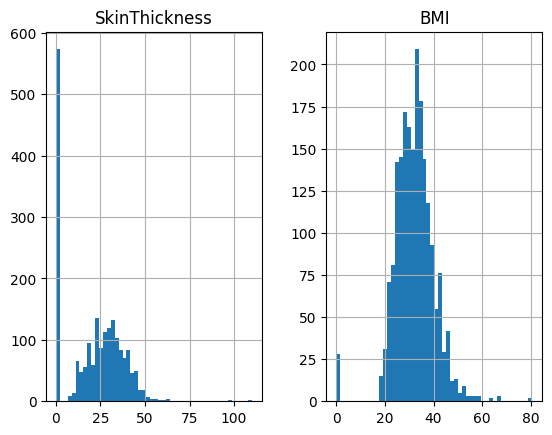

In [11]:
diabetes[['SkinThickness', 'BMI']].hist(bins=50)

Notice that the variable `BMI` posseses a close-to-symmetrical distribution, nevertheless, this measure of skewness fails assesssing how the variable `SkinThickness` is skewed. This is due to a large amount of registers with a value of zero. Let's correct that.

In [12]:
diabetes['SkinThickness'] > 0

0        True
1        True
2       False
3        True
4        True
        ...  
1995     True
1996     True
1997    False
1998     True
1999     True
Name: SkinThickness, Length: 2000, dtype: bool

In [13]:
diabetes[diabetes['SkinThickness'] > 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1998,0,129,110,46,130,67.1,0.319,26,1


<Axes: >

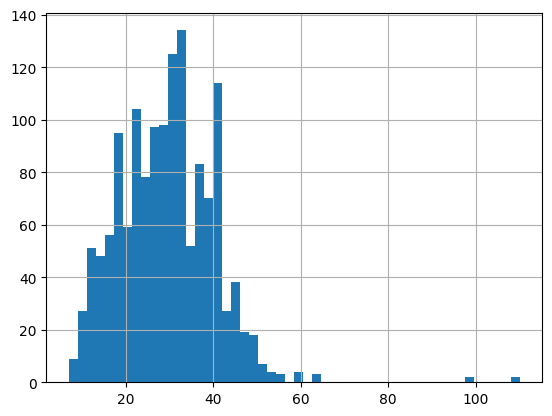

In [14]:
diabetes.loc[diabetes['SkinThickness'] > 0, 'SkinThickness'].hist(bins=50)

What does the method `describe` has to say about this?

In [15]:
diabetes[(diabetes['SkinThickness'] > 0) & (diabetes['Insulin'] > 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
8,2,83,65,28,66,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1998,0,129,110,46,130,67.1,0.319,26,1


<Axes: >

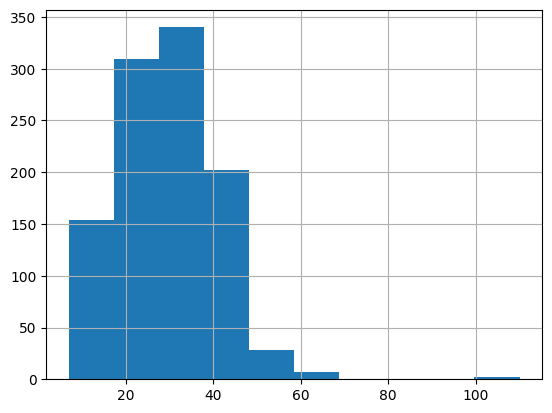

In [16]:
diabetes.loc[(diabetes['SkinThickness'] > 0) & (diabetes['Insulin'] > 0), 'SkinThickness'].hist()

array([[<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>]], dtype=object)

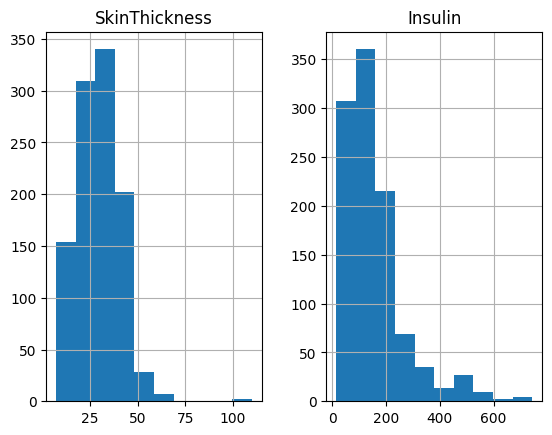

In [17]:
diabetes.loc[(diabetes['SkinThickness'] > 0) & (diabetes['Insulin'] > 0), ['SkinThickness', 'Insulin']].hist()

Do you notice the difference? It seems that those zero values are "making some noise." This could suggest that we might need a method to handle these zeros. 

Given the later, it is important to mention that the method for measuring skewness that we talked about is one of many, and not only that, it is not infallible.

## Scatter plots

Scatter plots are a good way to visualize the relation between two variables. Let's assume we're interested in exploring how `BMI` and `BloodPressure` are related. Well, we will "scatter them both."

<Axes: xlabel='BMI', ylabel='BloodPressure'>

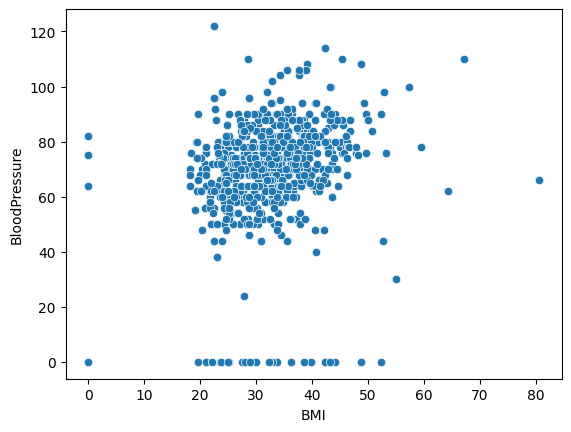

In [18]:
sns.scatterplot(x='BMI', y='BloodPressure', data=diabetes)

There is definitely a cluster, however, the plot shows that these two variables are correlated in a positive fashion: if one increases, the other goes up as well; if one goes down, the other does the same. In fact, I am not a doctor, but this makes sense: the higher the `BMI`, the higher the `BloodPressure`.

## Correlation

According to Wikipedia, "in the broadest sense, correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related." So, if two variables have any type of statistical association with each other, they can be correlated, either positively or negatively. In fact, let's take a look at the following table:

<img src="illuminati.jpg" alt="Drawing" style="width: 500px;"/>

What do you make of this? Are we able to conclude that epidemic and pandemics are caused by advances in technology that work with electromagnetic waves?

Well, of course not, these two variables might be correlated, but **correlation does not imply causation**. The moral of the story is that it is not wise to establish a cause-and-effect relationship based solely on correlation. Please, if you are reading this, just don't do it, this might lead you to conclude absurd things.

However, stablishing correlations between a variable of interest and some predictors can be useful, as well as measuring the correlation between variables that we employ as predictors. A way to do this visually is with a **correlation matrix**. The following code does this for us with the variables of the `diabetes` dataset.

Text(0.5, 1.0, 'Correlation matrix for the diabetes dataset')

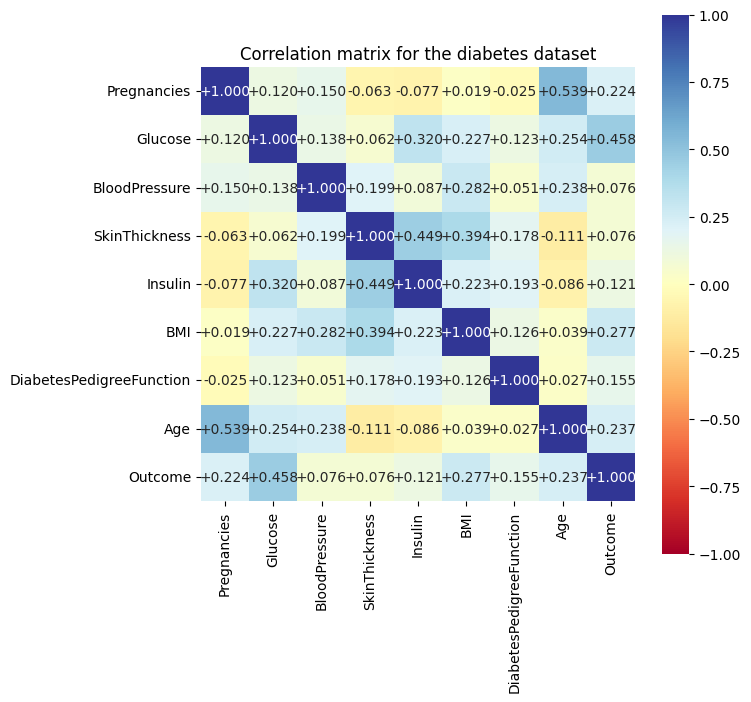

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(diabetes.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the diabetes dataset")

## Detecting Outliers

There are different techniques for detecting outliers, one of them being the **z-score**. This quantity is defined as follows:

$$z=\frac{x-\mu}{\sigma}$$,

where $x$ is some observation. 

If a variable follows a normal distribution, or close to normal, then this score is worth using. The following image shows why:

<img src="normal.png" alt="Drawing" style="width: 500px;"/>

The criterion for detecting outliers using the z-scores goes as this: if for a given observation $x$ the absolute value of its z-score is greater than 3, then x is an outlier.

The `BMI` variable seems to follow a close to normal distribution, does it have any outliers?

In [20]:
sigma = diabetes['BMI'].std()
mu = diabetes['BMI'].mean()

In [21]:
diabetes[diabetes['BMI'] > mu + 3 * sigma]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0
915,0,180,78,63,14,59.4,2.420,25,1
1130,3,123,100,35,240,57.3,0.880,22,0
1335,0,129,110,46,130,67.1,0.319,26,1
1504,0,180,78,63,14,59.4,2.420,25,1
1563,4,183,66,0,215,80.6,0.654,40,0
1564,1,100,62,0,0,64.4,0.152,36,0
1586,4,183,66,0,215,80.6,0.654,40,0


In [22]:
diabetes[diabetes['BMI'] < mu - 3 * sigma]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,3,80,0,0,0,0.0,0.174,22,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [23]:
diabetes['z-score'] = (diabetes['BMI'] - mu) / sigma
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,z-score
0,2,138,62,35,0,33.6,0.127,47,1,0.172640
1,0,84,82,31,125,38.2,0.233,23,0,0.737064
2,0,145,0,0,0,44.2,0.630,31,1,1.473269
3,0,135,68,42,250,42.3,0.365,24,1,1.240138
4,1,139,62,41,480,40.7,0.536,21,0,1.043816
...,...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0,-0.305893
1996,8,179,72,42,130,32.7,0.719,36,1,0.062209
1997,6,85,78,0,0,31.2,0.382,42,0,-0.121842
1998,0,129,110,46,130,67.1,0.319,26,1,4.283120


<Axes: >

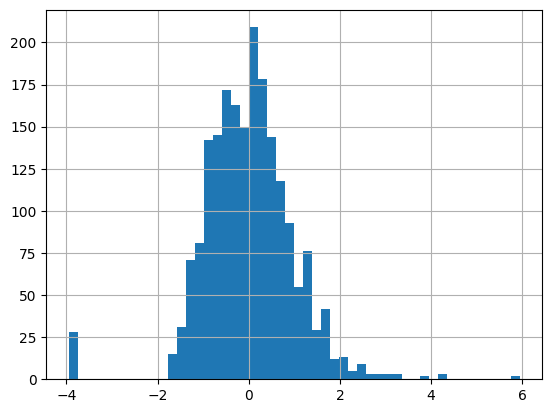

In [24]:
diabetes['z-score'].hist(bins=50)

### Boxplots

**Boxplots** are another technique that help us to understand the distribution of a variable and are useful for detecting outliers as well. The following image shows the "anatomy" of a boxplot (in Spanish!):

<img src="boxplot.png" alt="Drawing" style="width: 500px;"/>

Everything looks pretty clear, except for maximum and minimum non-atypical values. These are calculated as follows:

$$\text{Maximum non-atypical value}=Q_3+\frac{3}{2}IQR$$
$$\text{Minimum non-atypical value}=Q_1-\frac{3}{2}IQR$$,

where $IQR=Q_3-Q_1$.

This story would not be complete without a real boxplot, right?

<Axes: ylabel='BMI'>

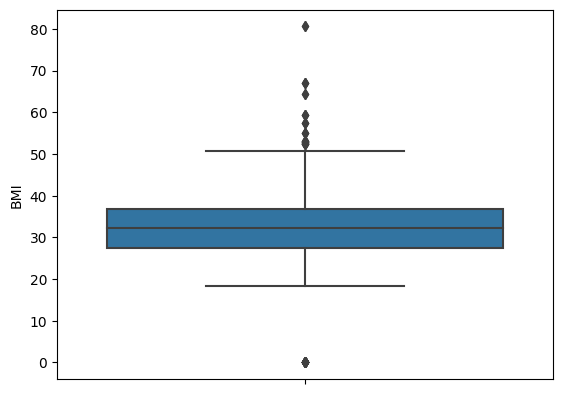

In [26]:
sns.boxplot(y='BMI', data=diabetes)

<Axes: ylabel='Pregnancies'>

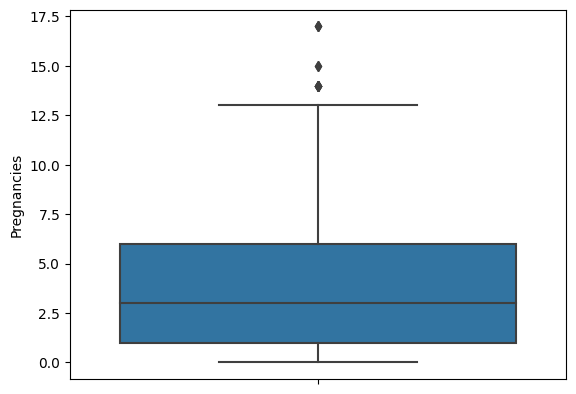

In [27]:
sns.boxplot(y='Pregnancies', data=diabetes)

## Barplots

Barplots are another tool that we can use to understand data better. For instance, say we want to see if there is a difference in the variable `BMI` of people with diabetes and people who dont't have this condition. We could do something like the following:

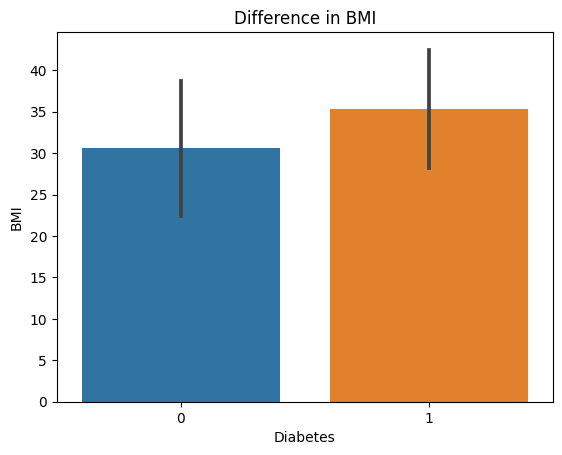

In [28]:
sns.barplot(data=diabetes, x='Outcome', y='BMI', errorbar='sd')
sns.set_palette('Set2')

plt.title('Difference in BMI')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

plt.show()

We can also use another variant of `barplot` known as `countplot`.

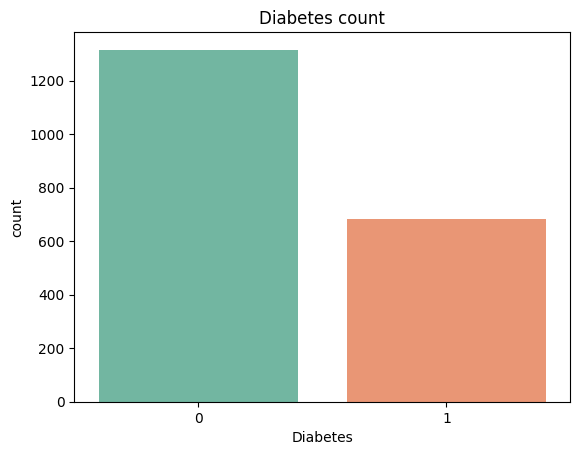

In [30]:
sns.countplot(data=diabetes, x='Outcome')
sns.set_palette('Set2')

plt.title('Diabetes count')
plt.xlabel('Diabetes')

plt.show()

## Groupby

Another useful tool is the `groupy` method: if we wanna group our data by categories and then aggregate it with some function, this could help us to understand differences among several categories in our data.

In [31]:
diabetes.groupby(by='Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,z-score
Outcome,,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307,-0.199453
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140,0.383743
